In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [3]:
df=pd.DataFrame()

In [4]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [12]:
df.head()

,exp(in months),salary(in thousands)
0,19.895286,22.658933
1,45.638395,40.372915
2,14.695115,19.727605
3,26.486335,30.168848
4,27.410901,33.188525


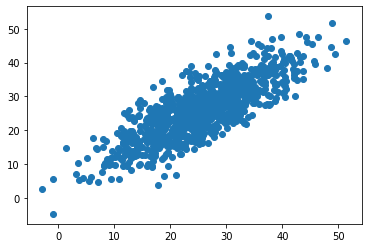

In [13]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [11]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [8]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [49]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [50]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred=regressor.predict(X_test)

In [52]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient/slope
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

0.8060934176158328
5.062481287487085


In [53]:
df_error=pd.DataFrame()
df_error['y_pred']=y_pred
df_error['y_test']=y_test
df_error.shape

(200, 2)

In [54]:
df_error

,y_pred,y_test
0,34.364081,47.275121
1,29.902692,31.242687
2,22.666743,32.380606
3,39.104681,43.315478
4,15.787818,19.813167
...,...,...
195,39.944903,33.421857
196,23.201939,18.166049
197,14.184400,16.974243
198,20.991478,15.633285


In [55]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.753588293939506

In [56]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

23.214883753504946

In [57]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

4.818182619360224

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.701234721858305

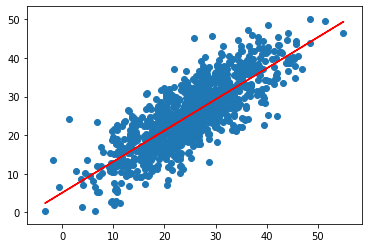

In [59]:
# Visualising the regression line
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])